In [31]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
people = pd.read_csv('/Users/OpeyemiAyodele/Desktop/people.csv')
people.head(5)

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [3]:
train = pd.read_csv('/Users/OpeyemiAyodele/Desktop/act_train.csv')
train.head(5)

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [4]:
x = people['char_38'].values
x

array([36, 76, 99, ...,  0, 95, 36])

In [5]:
sns.set(rc={'figure.figsize': (16,3)})

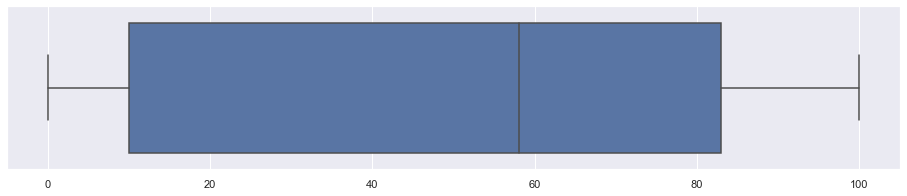

In [6]:
sns.boxplot(x)

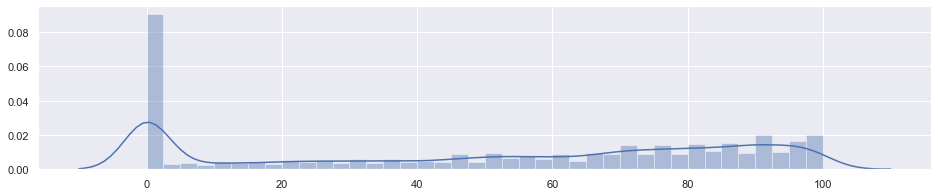

In [7]:
mean = people['char_38'].mean()
mean

sns.distplot(x)


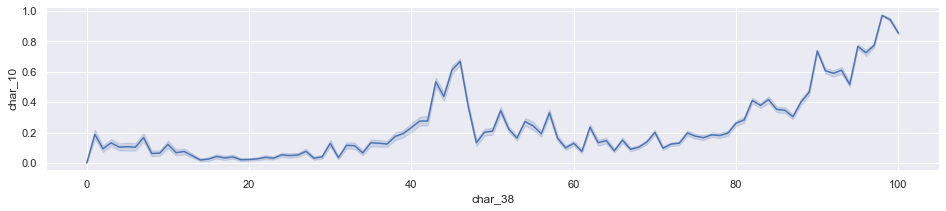

In [8]:
ax = sns.lineplot(x = 'char_38', y = 'char_10', data = people)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

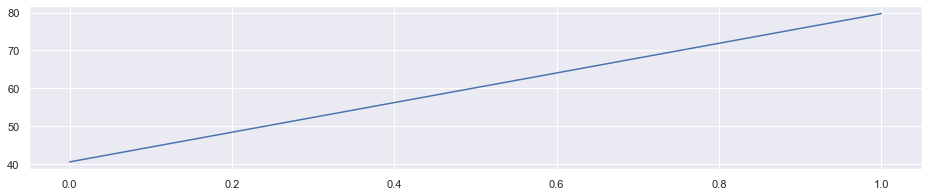

In [9]:
ax = sns.lineplot(x = 'char_10', y = 'char_38', data = people)

In [ ]:
ax = sns.barplot(x = 'char_38', y = 'char_10', data = people, palette = ["red", "green", "blue"], ci = False)

In [ ]:
ax = sns.barplot(x = 'char_38', y = 'char_3', data = people, palette = ["red", "green", "blue"], ci = False)

In [ ]:
# merge files

In [11]:
people_train_merge = pd.merge(people,train, on='people_id')

In [12]:
people_train_merge.columns

Index(['people_id', 'char_1_x', 'group_1', 'char_2_x', 'date_x', 'char_3_x',
       'char_4_x', 'char_5_x', 'char_6_x', 'char_7_x', 'char_8_x', 'char_9_x',
       'char_10_x', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37', 'char_38', 'activity_id',
       'date_y', 'activity_category', 'char_1_y', 'char_2_y', 'char_3_y',
       'char_4_y', 'char_5_y', 'char_6_y', 'char_7_y', 'char_8_y', 'char_9_y',
       'char_10_y', 'outcome'],
      dtype='object')

In [13]:
people_train_merge.activity_category.unique()

array(['type 4', 'type 2', 'type 3', 'type 5', 'type 1', 'type 7',
       'type 6'], dtype=object)

In [14]:
v = people_train_merge[people_train_merge['outcome'] == 1]
nv = people_train_merge[people_train_merge['outcome'] == 0]

people_train_merge[[
       'char_10_x', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37', 'char_38', 'outcome']].mean()

char_10_x     0.241266
char_11       0.206522
char_12       0.234800
char_13       0.349471
char_14       0.255133
char_15       0.261994
char_16       0.268262
char_17       0.279715
char_18       0.177445
char_19       0.271194
char_20       0.208765
char_21       0.268598
char_22       0.269222
char_23       0.284165
char_24       0.180764
char_25       0.317895
char_26       0.168235
char_27       0.233420
char_28       0.271837
char_29       0.163146
char_30       0.203810
char_31       0.268472
char_32       0.268001
char_33       0.214078
char_34       0.345801
char_35       0.201331
char_36       0.328266
char_37       0.270833
char_38      49.980511
outcome       0.443954
dtype: float64

In [24]:
people_train_merge.loc[people_train_merge['outcome'] == 0, :][['char_10_x', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37', 'outcome']].mean() #.plot(kind='bar') for visual graph

char_10_x    0.138419
char_11      0.124681
char_12      0.149603
char_13      0.212266
char_14      0.158686
char_15      0.158280
char_16      0.157953
char_17      0.164649
char_18      0.105264
char_19      0.160178
char_20      0.110510
char_21      0.158201
char_22      0.155879
char_23      0.174840
char_24      0.104651
char_25      0.197717
char_26      0.110502
char_27      0.144676
char_28      0.161415
char_29      0.101111
char_30      0.127994
char_31      0.167970
char_32      0.157622
char_33      0.135915
char_34      0.212560
char_35      0.124272
char_36      0.195533
char_37      0.155955
outcome      0.000000
dtype: float64

In [23]:
people_train_merge.loc[people_train_merge['outcome'] == 1, :][['char_10_x', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37', 'outcome']].mean()

char_10_x    0.370080
char_11      0.309027
char_12      0.341508
char_13      0.521318
char_14      0.375931
char_15      0.391894
char_16      0.406422
char_17      0.423834
char_18      0.267851
char_19      0.410240
char_20      0.331828
char_21      0.406867
char_22      0.411181
char_23      0.421092
char_24      0.276095
char_25      0.468417
char_26      0.240544
char_27      0.344571
char_28      0.410139
char_29      0.240844
char_30      0.298769
char_31      0.394350
char_32      0.406249
char_33      0.311975
char_34      0.512683
char_35      0.297846
char_36      0.494511
char_37      0.414715
outcome      1.000000
dtype: float64

In [22]:
people_train_merge.char_11.unique()

array([False,  True])

In [25]:
people_train_merge.loc[people_train_merge['outcome'] == 1, :][[ 'char_13','char_34']].mean()

char_13    0.521318
char_34    0.512683
dtype: float64

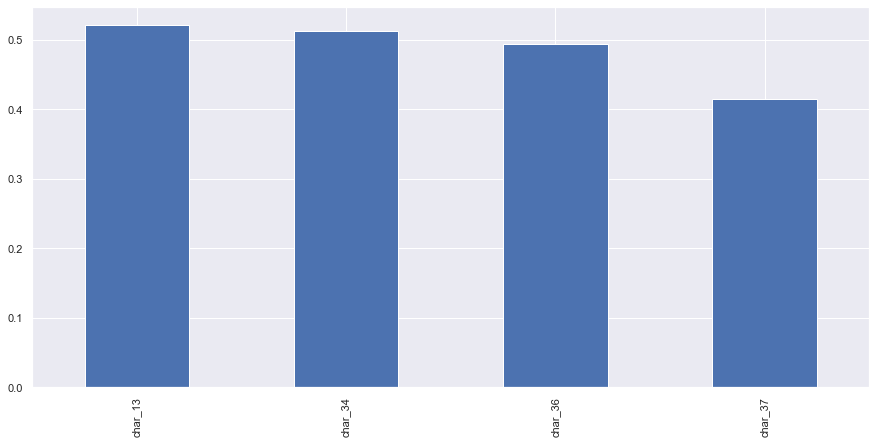

In [38]:
# greatest impact on positive business value
plt.figure(figsize=(15,7))
people_train_merge.loc[people_train_merge['outcome'] == 1, :][[ 'char_13','char_34','char_36','char_37']].mean().plot(kind='bar') 

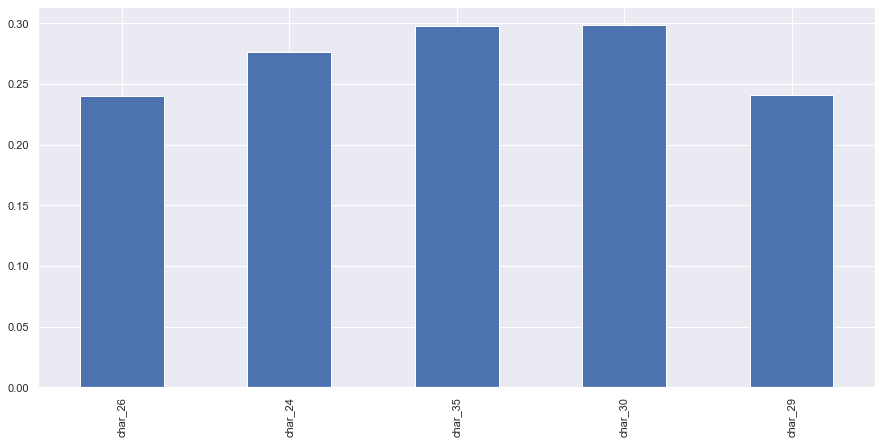

In [39]:
#least impact on positive business value
plt.figure(figsize=(15,7))
people_train_merge.loc[people_train_merge['outcome'] == 1, :][[ 'char_26','char_24','char_35','char_30','char_29']].mean().plot(kind='bar') 

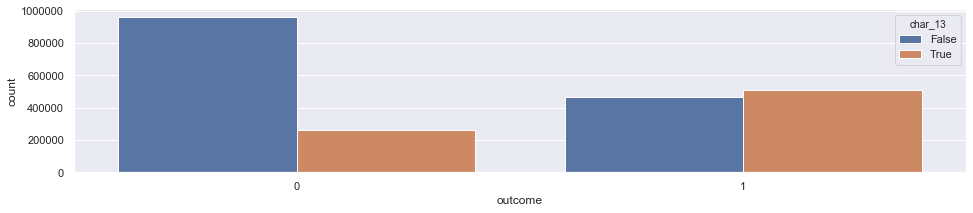

In [53]:
# example of char 13 true, and false
#more true values in char 13 would lead to more positive outcomes?
# as true increases the outcome 1 increases...

# goes deeper into above insight/ do one for the least positive outcome
sns.countplot('outcome', data=people_train_merge, hue='char_13')
#people_train_merge.pl_char_13.value_counts()

In [27]:
people_train_merge.loc[people_train_merge['outcome'] == 0, :][[ 'char_13','char_34']].mean()

char_13    0.212266
char_34    0.212560
dtype: float64

In [54]:
# plt.figure(figsize=(15,7))
# people_train_merge.loc[people_train_merge['outcome'] == 0, :][[ 'char_13','char_34']].mean().plot(kind='bar') 

In [35]:
pd.set_option('display.max_column', None)

In [37]:
people_train_merge.head(200)

,people_id,char_1_x,group_1,char_2_x,date_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,activity_id,date_y,activity_category,char_1_y,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,outcome
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ppl_100045,type 2,group 17304,type 2,2022-09-21,type 40,type 25,type 9,type 2,type 6,type 5,type 5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7,act2_3220346,2022-09-22,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 4829,0
196,ppl_100045,type 2,group 17304,type 2,2022-09-21,type 40,type 25,type 9,type 2,type 6,type 5,type 5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7,act2_3484975,2022-09-22,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 4829,0
197,ppl_100045,type 2,group 17304,type 2,2022-09-21,type 40,type 25,type 9,type 2,type 6,type 5,type 5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7,act2_3617309,2022-09-22,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 4829,0
198,ppl_100045,type 2,group 17304,type 2,2022-09-21,type 40,type 25,type 9,type 2,type 6,type 5,type 5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7,act2_3893165,2022-09-22,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 4829,0


In [41]:
# how many chars had business value 1 and business value 0 

In [ ]:
# display in visual

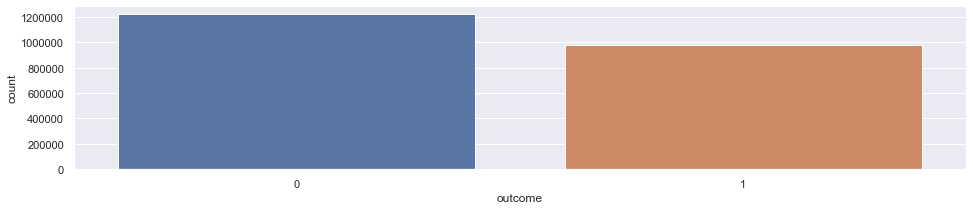

In [57]:
sns.countplot('outcome', data=people_train_merge)

In [ ]:
# Statistical Test? Are the defifference between the means in the outcome 0 and 1 (for char 13)
#significant?
#If you have a p value of 0 it just means that there is 0% chance of you making an alpha error; 
#meaning there is a 0 per cent chance of you stating that the subgroups of your population are 
#different when in fact they are not.

In [59]:
people_train_merge_0 = people_train_merge['outcome'] == 0
people_train_merge_1 = people_train_merge['outcome'] == 1
stats.ttest_ind(people_train_merge[people_train_merge_0]['char_13'], people_train_merge[people_train_merge_1]['char_13'], equal_var=False)

Ttest_indResult(statistic=-493.1944437127587, pvalue=0.0)